In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"D:\Data Analysis\NETFLEX\netflix_titles.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
data.shape

(8807, 12)

In [5]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [9]:
data.isna().sum() #no missing value....

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
data = data.dropna(subset=['director'])
data = data.dropna(subset=['cast'])
data = data.dropna(subset=['country'])
data = data.dropna(subset=['date_added'])
data = data.dropna(subset=['rating'])
data = data.dropna(subset=['duration'])

In [11]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
# Convert the 'release_year' column to datetime format
data['release_year'] = pd.to_datetime(data['release_year'], format='%Y')

# Extract the year and count occurrences
data['release_year'].dt.year.value_counts()

release_year
2017    657
2018    648
2016    577
2019    519
2020    442
       ... 
1946      1
1961      1
1942      1
1947      1
1944      1
Name: count, Length: 72, dtype: int64

In [13]:
data['type'].value_counts()

type
Movie      5185
TV Show     147
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

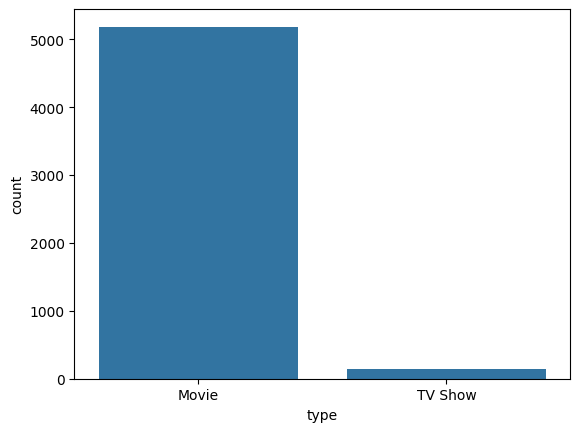

In [14]:
sns.countplot(x='type',data=data)

In [15]:
data[(data["type"]=='Movie') | (data['release_year']==2000)].duplicated().count()

5185

In [16]:
data[(data["type"]=='Movie') | (data['release_year']==2000)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993-01-01,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021-01-01,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021-01-01,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998-01-01,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010-01-01,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015-01-01,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007-01-01,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009-01-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006-01-01,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [17]:
data[(data["type"]=='TV Show') | (data['release_year']==2000)].duplicated().count()

147

In [18]:
data[(data["type"]=='TV Show') | (data['release_year']==2000)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021-01-01,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,"August 27, 2021",2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...
273,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i..."
276,s277,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,"August 13, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...",A writer in creative and marital crises finds ...
297,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,"August 6, 2021",2021-01-01,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8172,s8173,TV Show,Th Eena Meena Deeka Chase Comedy Show,Dheeraj Berry,"Sanjay Keni, Priya Raina",India,"March 31, 2018",2015-01-01,TV-Y7,1 Season,"Kids' TV, TV Comedies","A hungry fox and three resourceful, surprising..."
8214,s8215,TV Show,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,David Attenborough,United Kingdom,"October 10, 2015",2001-01-01,TV-G,1 Season,"British TV Shows, Docuseries, International TV...",David Attenborough narrates this definitive ex...
8293,s8294,TV Show,The Fear,Michael Samuels,"Peter Mullan, Anastasia Hille, Harry Lloyd, Pa...",United Kingdom,"March 31, 2017",2012-01-01,TV-MA,1 Season,"British TV Shows, Crime TV Shows, TV Dramas",Richie Beckett is an aging Brighton crime boss...
8302,s8303,TV Show,The Five,Mark Tonderai,"Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah ...",United Kingdom,"September 15, 2017",2016-01-01,TV-MA,1 Season,"British TV Shows, Crime TV Shows, TV Dramas",Twenty years after 5-year-old Jesse disappears...


In [19]:
data[(data["type"]=='TV Show') | (data['country']=='India')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021-01-01,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998-01-01,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,"September 5, 2021",2017-01-01,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,"September 2, 2021",1994-01-01,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...
116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,"September 2, 2021",2015-01-01,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...
...,...,...,...,...,...,...,...,...,...,...,...,...
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,"May 1, 2017",2013-01-01,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ..."
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,"January 1, 2018",2006-01-01,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014-01-01,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009-01-01,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...


In [20]:
data[(data["type"]=='TV Show') | (data['country']=='India')].duplicated().count()

1015

In [21]:
data[data['director']=='Marcus Raboy']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2507,s2508,TV Show,Patton Oswalt: I Love Everything,Marcus Raboy,"Patton Oswalt, Bob Rubin",United States,"May 19, 2020",2020-01-01,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Turning 50. Finding love again. Buying a house...
2849,s2850,Movie,Taylor Tomlinson: Quarter-Life Crisis,Marcus Raboy,Taylor Tomlinson,United States,"March 3, 2020",2020-01-01,TV-MA,61 min,Stand-Up Comedy,She's halfway through her 20s — and she's over...
3776,s3777,Movie,Miranda Sings Live…Your Welcome,Marcus Raboy,Colleen Ballinger,United States,"June 4, 2019",2019-01-01,TV-14,62 min,Stand-Up Comedy,Viral video star Miranda Sings and her real-wo...
3877,s3878,Movie,Anthony Jeselnik: Fire in the Maternity Ward,Marcus Raboy,Anthony Jeselnik,United States,"April 30, 2019",2019-01-01,TV-MA,64 min,Stand-Up Comedy,"Forging his own comedic boundaries, Anthony Je..."
4314,s4315,Movie,Vir Das: Losing It,Marcus Raboy,Vir Das,United States,"December 11, 2018",2018-01-01,TV-MA,68 min,Stand-Up Comedy,"The world's got a lot of problems, but Vir Das..."
4788,s4789,Movie,Katt Williams: Kattpacalypse,Marcus Raboy,Katt Williams,United States,"July 3, 2018",2012-01-01,TV-MA,61 min,Stand-Up Comedy,Urban comic Katt Williams ushers in Kattpacaly...
4851,s4852,Movie,Steve Martin and Martin Short: An Evening You ...,Marcus Raboy,"Steve Martin, Martin Short",United States,"May 25, 2018",2018-01-01,TV-14,74 min,Stand-Up Comedy,Longtime pals and showbiz icons Steve Martin a...
5024,s5025,Movie,Marlon Wayans: Woke-ish,Marcus Raboy,Marlon Wayans,United States,"February 27, 2018",2018-01-01,TV-MA,67 min,Stand-Up Comedy,"Rollicking, outrageous and audacious, Marlon W..."
5127,s5128,Movie,Judd Apatow: The Return,Marcus Raboy,Judd Apatow,United States,"December 12, 2017",2017-01-01,TV-MA,70 min,Stand-Up Comedy,Judd Apatow returns to stand-up comedy after 2...
5171,s5172,Movie,DeRay Davis: How to Act Black,Marcus Raboy,DeRay Davis,United States,"November 14, 2017",2017-01-01,TV-MA,66 min,Stand-Up Comedy,Dynamic comic DeRay Davis hits the stage like ...


In [22]:
data[data['director']=='Marcus Raboy'].duplicated().count()

15

In [23]:

data[data['director'] =='Marcus Raboy']['release_year']

2507   2020-01-01
2849   2020-01-01
3776   2019-01-01
3877   2019-01-01
4314   2018-01-01
4788   2012-01-01
4851   2018-01-01
5024   2018-01-01
5127   2017-01-01
5171   2017-01-01
5315   2017-01-01
5319   2017-01-01
5518   2017-01-01
5627   2017-01-01
5724   2016-01-01
Name: release_year, dtype: datetime64[ns]

In [24]:
data[data['release_year'] == '2021']['director']    #lma a3wz agib al colum da blnsba llcoulm da

8             Andy Devonshire
9              Theodore Melfi
12        Christian Schwochow
81      Cedric Nicolas-Troyan
190         Sharan Koppisetty
                ...          
1411            Ross Kauffman
1412              Sung Do-jun
1424             Ross Venokur
1432     Maite Ruiz De Austri
1468             Kim Dong-kyu
Name: director, Length: 161, dtype: object

In [25]:
data[data['release_year'] == '2021']['director'].count()

161

In [26]:
data[data['duration'] == '99 min']['title']

51      InuYasha the Movie 2: The Castle Beyond the Lo...
52      InuYasha the Movie 3: Swords of an Honorable R...
337                                       Good Luck Chuck
344                                             My Girl 2
426                                               Cousins
                              ...                        
8441                   The Nutcracker and the Four Realms
8497                                        The Sapphires
8540                                           The Tuxedo
8625                                Tremors 5:  Bloodline
8685                                                  VS.
Name: title, Length: 106, dtype: object

In [27]:
data[data['duration'] == '1 Season']['title']

198                 King of Boys: The Return of the King
273                                        Gone for Good
297                                             Navarasa
316                                         Office Girls
681                                They've Gotta Have Us
                              ...                       
7918                                      Sadqay Tumhare
8172               Th Eena Meena Deeka Chase Comedy Show
8214    The Blue Planet: A Natural History of the Oceans
8293                                            The Fear
8302                                            The Five
Name: title, Length: 106, dtype: object

In [28]:
data[data['rating'] == 'R']['title']

46                       Safe House
48                     Training Day
81                             Kate
122                      In the Cut
131     Blade Runner: The Final Cut
                   ...             
8765                             XX
8768              Y Tu Mamá También
8791                    Young Adult
8802                         Zodiac
8804                     Zombieland
Name: title, Length: 778, dtype: object

In [29]:
(data[data['rating'] == 'TV-14']['duration']).head(2)

8     9 Seasons
24      166 min
Name: duration, dtype: object

In [30]:
data[data['rating'] == 'TV-14']['type'].value_counts()

type
Movie      1177
TV Show      37
Name: count, dtype: int64

In [31]:
data['director'].value_counts().head(3)

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Name: count, dtype: int64

In [32]:
data[(data['type']=='Movie') & (data['country']=='India')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998-01-01,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,"September 5, 2021",2017-01-01,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,"September 2, 2021",1994-01-01,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...
116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,"September 2, 2021",2015-01-01,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,"September 2, 2021",2017-01-01,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,"May 1, 2017",2013-01-01,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ..."
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,"January 1, 2018",2006-01-01,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014-01-01,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009-01-01,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...


In [33]:
data[(data['type']=='Movie') & (data['country']=='India')].duplicated().count()

868

In [34]:
data[(data['type']=='Movie') & (data['country']=='India') & (data['release_year']=='1994-01-01')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,"September 2, 2021",1994-01-01,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...
2545,s2546,Movie,Andaz Apna Apna,Rajkumar Santoshi,"Aamir Khan, Salman Khan, Raveena Tandon, Karis...",India,"May 11, 2020",1994-01-01,TV-14,160 min,"Action & Adventure, Comedies, Cult Movies",Broke and with no concrete plans for the futur...
2957,s2958,Movie,Hum Aapke Hain Koun,Sooraj R. Barjatya,"Madhuri Dixit, Salman Khan, Mohnish Bahl, Renu...",India,"February 1, 2020",1994-01-01,TV-14,193 min,"Classic Movies, Dramas, International Movies","Although Nisha falls for Prem, she agrees to m..."
5408,s5409,Movie,Yaar Gaddar,Umesh Mehra,"Mithun Chakraborty, Saif Ali Khan, Somy Ali, P...",India,"July 1, 2017",1994-01-01,TV-14,148 min,"Dramas, International Movies",When his brother becomes involved in a deadly ...
5482,s5483,Movie,Kabhi Haan Kabhi Naa,Kundan Shah,"Shah Rukh Khan, Suchitra Krishnamoorthi, Deepa...",India,"May 15, 2017",1994-01-01,TV-14,151 min,"Comedies, Dramas, International Movies",A dreamer falls for a girl who is in love with...


In [35]:
data[(data['type']=='Movie') & (data['country']=='India') & (data['release_year']=='1994-01-01')].duplicated().count()

5

In [36]:
data[data['cast'].str.contains('Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021-01-01,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [37]:
# Convert 'release_year' to datetime            #مهمممممممممم
data['release_year'] = pd.to_datetime(data['release_year'], errors='coerce')

# Filter the dataframe by release year being 1997
data[data['release_year'].dt.year == 2000]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
350,s351,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,"August 1, 2021",2000-01-01,PG-13,130 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy",A retired engineer agrees to help NASA prevent...
359,s360,Movie,The Original Kings of Comedy,Spike Lee,"Steve Harvey, D.L. Hughley, Cedric the Enterta...",United States,"August 1, 2021",2000-01-01,R,111 min,Stand-Up Comedy,"Comedians Steve Harvey, Cedric the Entertainer..."
566,s567,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany","July 1, 2021",2000-01-01,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...
593,s594,Movie,Snow Day,Chris Koch,"Chris Elliott, Mark Webber, Jean Smart, Schuyl...",United States,"July 1, 2021",2000-01-01,PG,89 min,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the..."
779,s780,Movie,Battlefield Earth,Roger Christian,"John Travolta, Barry Pepper, Forest Whitaker, ...",United States,"June 2, 2021",2000-01-01,PG-13,118 min,"Action & Adventure, Cult Movies, Sci-Fi & Fantasy","In the year 3000, an alien race known as the P..."
952,s953,Movie,The Whole Nine Yards,Jonathan Lynn,"Bruce Willis, Matthew Perry, Rosanna Arquette,...",United States,"May 1, 2021",2000-01-01,R,99 min,"Action & Adventure, Comedies",An unhappily married dentist becomes mixed up ...
3472,s3473,Movie,Rugrats in Paris: The Movie,"Stig Bergqvist, Paul Demeyer","Elizabeth Daily, Tara Strong, Cheryl Chase, Ch...","Germany, United States","October 1, 2019",2000-01-01,G,79 min,"Children & Family Movies, Comedies",The Rugrats take to the big screen and visit P...
4545,s4546,Movie,Monty Python: Before the Flying Circus,Will Yapp,"Graham Chapman, Eric Idle, Terry Jones, Michae...",United Kingdom,"October 2, 2018",2000-01-01,TV-MA,56 min,"Comedies, Documentaries",Discover how six seemingly ordinary but suprem...
4723,s4724,Movie,Fiza,Khalid Mohamed,"Karisma Kapoor, Jaya Bhaduri, Hrithik Roshan, ...",India,"August 2, 2018",2000-01-01,TV-14,163 min,"Dramas, International Movies, Music & Musicals",Fiza's brother disappears during Mumbai's horr...
4956,s4957,Movie,Phir Bhi Dil Hai Hindustani,Aziz Mirza,"Shah Rukh Khan, Juhi Chawla, Paresh Rawal, Sat...",India,"April 1, 2018",2000-01-01,TV-14,159 min,"Comedies, Dramas, International Movies","In this Bollywood entertainment, two journalis..."


In [38]:
data[data['release_year'].dt.year == 2000].duplicated().count()

32

In [39]:
data[(data['type']=='Movie') & (data['country']=='India') & (data['release_year']>'1994-01-01')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998-01-01,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,"September 5, 2021",2017-01-01,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,"September 2, 2021",2015-01-01,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,"September 2, 2021",2017-01-01,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...
126,s127,Movie,Shikara,Vidhu Vinod Chopra,"Aadil Khan, Sadia Khateeb, Zain Khan Durrani, ...",India,"September 2, 2021",2020-01-01,TV-14,115 min,"Dramas, International Movies, Romantic Movies",A couple must strive to remain resilient after...
...,...,...,...,...,...,...,...,...,...,...,...,...
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,"May 1, 2017",2013-01-01,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ..."
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,"January 1, 2018",2006-01-01,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014-01-01,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009-01-01,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...


In [40]:
data[(data['type']=='Movie') & (data['country']=='India') & (data['release_year']>'1994-01-01')].duplicated().count()

811

In [42]:
data.sort_values(by='release_year',ascending=False)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1184,s1185,Movie,The Yin Yang Master,Li Weiran,"Chen Kun, Zhou Xun, Qu Chuxiao, Shen Yue, Will...",China,"March 19, 2021",2021-01-01,TV-14,120 min,"Action & Adventure, International Movies","A feud erupts between realms, and Yin Yang mas..."
910,s911,Movie,Monster,Anthony Mandler,"Kelvin Harrison Jr., Jennifer Hudson, Jeffrey ...",United States,"May 7, 2021",2021-01-01,TV-MA,99 min,Dramas,A talented teen implicated in a robbery-turned...
297,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,"August 6, 2021",2021-01-01,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions..."
299,s300,Movie,The Swarm,Just Philippot,"Suliane Brahim, Sofian Khammes, Marie Narbonne...",France,"August 6, 2021",2021-01-01,TV-14,102 min,"Horror Movies, Independent Movies, Internation...",A single mother breeds locusts as high-protein...
300,s301,Movie,Vivo,"Kirk DeMicco, Brandon Jeffords","Lin-Manuel Miranda, Ynairaly Simo, Zoe Saldana...","Canada, United States","August 6, 2021",2021-01-01,PG,100 min,"Children & Family Movies, Music & Musicals",A music-loving kinkajou embarks on the journey...
...,...,...,...,...,...,...,...,...,...,...,...,...
8587,s8588,Movie,Thunderbolt,"William Wyler, John Sturges","James Stewart, Lloyd Bridges",United States,"March 31, 2017",1947-01-01,TV-PG,42 min,"Classic Movies, Documentaries",A P-47 Thunderbolt squadron is shown in prepar...
7294,s7295,Movie,Let There Be Light,John Huston,Walter Huston,United States,"March 31, 2017",1946-01-01,TV-PG,58 min,"Classic Movies, Documentaries",Some returning combat veterans suffer scars th...
7219,s7220,Movie,Know Your Enemy - Japan,"Frank Capra, Joris Ivens","Walter Huston, Dana Andrews",United States,"March 31, 2017",1945-01-01,TV-14,63 min,"Classic Movies, Documentaries",Though culturally insensitive by modern standa...
8640,s8641,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,"United States, United Kingdom","March 31, 2017",1944-01-01,TV-14,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...
